In [139]:
# Installation - WordCloud:
!pip install wordcloud
print("WorldCloud wurde erfolgreich installiert.")

WorldCloud wurde erfolgreich installiert.


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


In [140]:
# Import - Bibliotheken: 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
import json
import joblib
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from wordcloud import WordCloud
print("Die Bibliotheken wurden erfolgreich initialisiert!")

Die Bibliotheken wurden erfolgreich initialisiert!


In [141]:
# Neuste Version von Numpy installieren, da für Gensim mind. die Numpy-Version 2.0.0 notwendig ist:
import numpy as np
!pip install --upgrade numpy
print(np.__version__)
print("Die neuste Version von Numpy wurde erfolgreich installiert!")

1.26.4
Die neuste Version von Numpy wurde erfolgreich installiert!


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


In [142]:
# Installation - Gensim:
!pip install gensim
!pip show gensim
print("Gensim wurde erfolgreich installiert.")

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


Gensim wurde erfolgreich installiert.


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


In [143]:
# Gensim-Abhängigkeiten importieren:
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
print("Gensim-Abhängigkeiten wurden erfolgreich importiert.")

Gensim-Abhängigkeiten wurden erfolgreich importiert.


In [144]:
# Definition - Visualisierung:
plt.style.use('seaborn-v0_8-whitegrid')  # Matplotlib-Stil: weißer Hintergrund und Gitternetz
plt.rcParams['figure.figsize'] = (12, 8) # Standardgröße der Plots: 12x8 Zoll
plt.rcParams['font.size'] = 11           # Standard-Schriftgröße: 11pt
sns.set_style("whitegrid")               # Seaborn-Stil: weißer Hintergrund mit Gitternetz
print("Die Stile für die Visualisierung wurden festgelegt.")

Die Stile für die Visualisierung wurden festgelegt.


In [145]:
# Laden der vorverarbeiteten Daten:
try:
    tfidf_matrix = np.load('C:/Users/test/Desktop/Projekt_Data Analysis/TFIDF-Matrix.npy')
    tfidf_vectorizer = joblib.load('C:/Users/test/Desktop/Projekt_Data Analysis/TFIDF_Vektorisierung.joblib')
    
    count_matrix = np.load('C:/Users/test/Desktop/Projekt_Data Analysis/Zähl-Matrix_LDA.npy')
    count_vectorizer = joblib.load('C:/Users/test/Desktop/Projekt_Data Analysis/Zähl-Vektorisierung_LDA.joblib')
    
    dictionary = corpora.Dictionary.load('C:/Users/test/Desktop/Projekt_Data Analysis/gensim_dictionary.dict')
    tokenized_texts = joblib.load('C:/Users/test/Desktop/Projekt_Data Analysis/tokenized_texts.joblib')
    gensim_corpus = joblib.load('C:/Users/test/Desktop/Projekt_Data Analysis/gensim_corpus.joblib')

except FileNotFoundError as e:
    print(f"Fehler beim Laden der vorverarbeiteten Daten: {e}")
    print("Zunächst die Datenvorverarbeitung vollständig ausführen und im Anschluss die Vektorisierung ausführen, damit alle Datensätze vorhanden sind.")


In [146]:
# Auswahl Themenanzahl für LSA:
n_components_lsa = 15

# Erstellung und Training LSA-Modell:
print('Das LSA-Modell wird trainiert...')
lsa_model = TruncatedSVD(n_components=n_components_lsa, random_state=42)
lsa_components = lsa_model.fit_transform(tfidf_matrix)
print('LSA-Modell-Training erfolgreich.')

Das LSA-Modell wird trainiert...
LSA-Modell-Training erfolgreich.


In [147]:
# Erklärung - Komponenten-Varianz:
explained_variance = lsa_model.explained_variance_ratio_.sum()
print(f"Erklärte Varianz durch {n_components_lsa} Komponenten: {explained_variance:.2%}") 

Erklärte Varianz durch 15 Komponenten: 38.90%


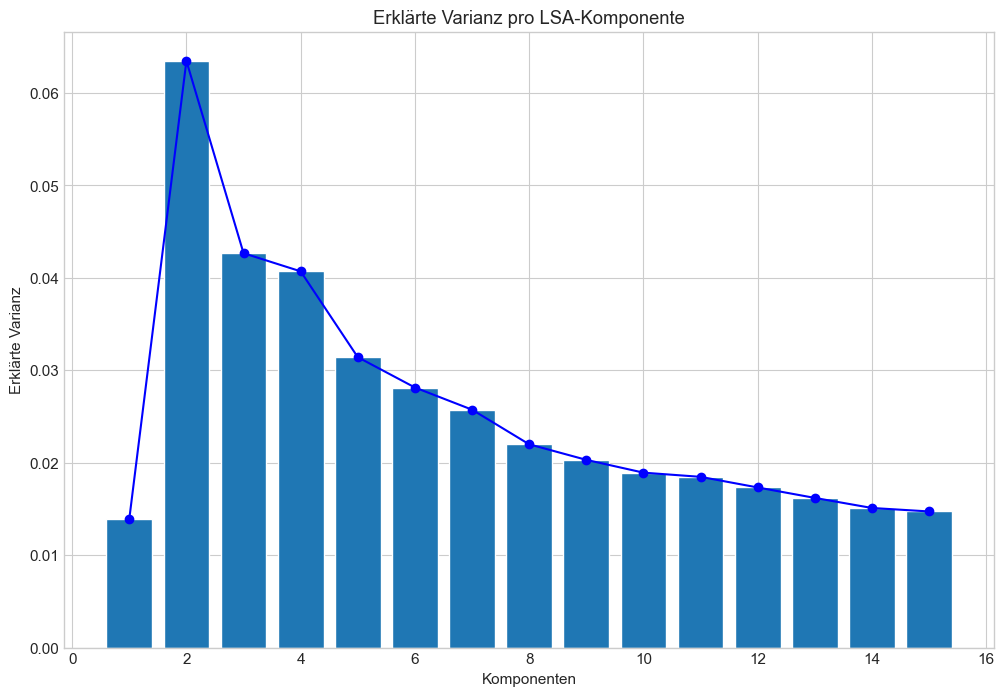

In [148]:
# Visualisierung der Varianz:
plt.plot(range(1, n_components_lsa + 1), lsa_model.explained_variance_ratio_, 'b-', marker='o')
plt.bar(range(1, n_components_lsa + 1), lsa_model.explained_variance_ratio_)
plt.xlabel('Komponenten')
plt.ylabel('Erklärte Varianz')
plt.title('Erklärte Varianz pro LSA-Komponente')
plt.show()

In [149]:
# Identifizierung der Top Begriffe für die LSA-Komponenten:
feature_names = tfidf_vectorizer.get_feature_names_out()
lsa_components_df = pd.DataFrame()

# Speicherung der wichtigsten Begriffe:
n_top_words = 20
lsa_top_words = {}

for i, component in enumerate(lsa_model.components_):
    top_indices = component.argsort()[:-n_top_words-1:-1] 
    top_words = [feature_names[idx] for idx in top_indices]
    top_weights = [component[idx] for idx in top_indices]
    
# Speicherung als DataFrame:
    component_df = pd.DataFrame({
        'Word': top_words,
        'Weight': top_weights
    })
    lsa_components_df = pd.concat([lsa_components_df, component_df], axis=1)
    
# Speicherung als JSON:
    lsa_top_words[f"topic_{i+1}"] = [
        {"word": word, "weight": float(weight)} 
        for word, weight in zip(top_words, top_weights)
    ]
    
    print(f"LSA Thema {i+1}: {', '.join(top_words[:10])}")


# Speicherung LSA-Themen als JSON:
with open('C:/Users/test/Desktop/Projekt_Data Analysis/lsa_topics.json', 'w') as f:
    json.dump(lsa_top_words, f, indent=4)

LSA Thema 1: credit, account, payment, report, loan, debt, bank, would, credit report, company
LSA Thema 2: credit, report, credit report, debt, reporting, account, collection, information, agency, bureau
LSA Thema 3: debt, call, collection, loan, company, phone, number, letter, agency, received
LSA Thema 4: loan, report, credit, mortgage, credit report, payment, modification, home, reporting, property
LSA Thema 5: account, debt, collection, bank, loan, reporting, mortgage, payment, agency, letter
LSA Thema 6: payment, debt, card, late, credit card, paid, collection, fee, balance, interest
LSA Thema 7: payment, call, late, report, phone, credit report, number, day, called, month
LSA Thema 8: loan, account, card, call, number, interest, balance, credit card, phone, collection
LSA Thema 9: bank, report, credit report, loan, check, fee, debt, money, call, payment
LSA Thema 10: bill, collection, paid, sent, would, letter, money, pay, agency, told
LSA Thema 11: fargo, well fargo, well, debt

In [150]:
# Berechnungsfunktionen - Kohärenzwerte und Perplexity:
def compute_coherence_values(count_matrix, count_vect, start=2, limit=20, step=2, tokenized_texts=None, dictionary=None):
    log_likelihood_values = []  # Liste - Kohärenzwertspeicherung
    model_list = []             # Liste - trainierte LDA-Modelle
    perplexity_values = []      # Liste - zur Perplexity-Werte (Modellqualität)
    coherence_scores = []       # Liste - Coherence Scores

    feature_names = count_vect.get_feature_names_out()
    
    # Schleife - Themenanzahl:
    for num_topics in range(start, limit+1, step):
        print(f"LDA Modell mit {num_topics} Themen trainieren...")

        # LDA-Modell-Initialisierung mit aktuellen Themen:
        lda = LatentDirichletAllocation(
            n_components=num_topics,       # Anzahl - Themen (Topics)
            max_iter=5,                    # Anzahl - Iterationen
            learning_method='online',      # Online-Lernmethode für inkrementelles Training
            random_state=42,               # Fixierung Zufallsstart (Reproduzierbarkeit)
            batch_size=128,                # Dokumentenanzahl
            n_jobs=-1,                     # Nutzung aller CPU-Kerne
            verbose=0,                     # Keine Ausgaben während des Trainings
        )

        # LDA-Modell-Training auf der Dokument-Term-Matrix:
        lda.fit(count_matrix)
        # Speicherung - Trainiertes Modell:
        model_list.append(lda)

        # Berechnung - Perplexity:
        perplexity_values.append(lda.perplexity(count_matrix))

        # Berechnung - Log-Likelihood:
        log_likelihood_values.append(lda.score(count_matrix))
        
        # Berechnung - Coherence Score:
        if tokenized_texts and dictionary:
            # Extraktion - Top-Wörter:
            keywords_per_topic = []
            
            for topic_idx, topic in enumerate(lda.components_):
                top_words_idx = topic.argsort()[:-11:-1]  # Top 10 Wörter
                top_words = [feature_names[i] for i in top_words_idx]
                keywords_per_topic.append(top_words)
            
            # Berechnung - Coherence Score mittels Gensim:
            cm = CoherenceModel(
                topics=keywords_per_topic,
                texts=tokenized_texts,
                dictionary=dictionary,
                coherence='c_v'
            )
            coherence_score = cm.get_coherence()
            coherence_scores.append(coherence_score)
            print(f"Coherence Score (c_v) für {num_topics} Themen: {coherence_score:.4f}")
        
    # Rückgabe: Liste der Modelle, Liste der Kohärenzwerte, Liste der Perplexity-Werte, Liste der Coherence Scores
    return model_list, log_likelihood_values, perplexity_values, coherence_scores


In [151]:
# Deklaration - Variablen:
start, limit, step = 2, 10, 2
print("Die Variablen: start, limit, step - wurden erfolgreich deklariert")

Die Variablen: start, limit, step - wurden erfolgreich deklariert


In [104]:
# Rückgabe LDA-Modell:
model_list, log_likelihood_values, perplexity_values, coherence_scores = compute_coherence_values(
    count_matrix, count_vectorizer, start=start, limit=limit, step=step,
    dictionary=dictionary, tokenized_texts=tokenized_texts
)
print("Training der LDA-Modelle abgeschlossen.")

LDA Modell mit 2 Themen trainieren...
Coherence Score (c_v) für 2 Themen: 0.4615
LDA Modell mit 4 Themen trainieren...
Coherence Score (c_v) für 4 Themen: 0.5280
LDA Modell mit 6 Themen trainieren...
Coherence Score (c_v) für 6 Themen: 0.5137
LDA Modell mit 8 Themen trainieren...
Coherence Score (c_v) für 8 Themen: 0.5280
LDA Modell mit 10 Themen trainieren...
Coherence Score (c_v) für 10 Themen: 0.5350
Training der LDA-Modelle abgeschlossen.


In [152]:
# Visualisierung - Metriken:
x = range(start, limit+1, step)

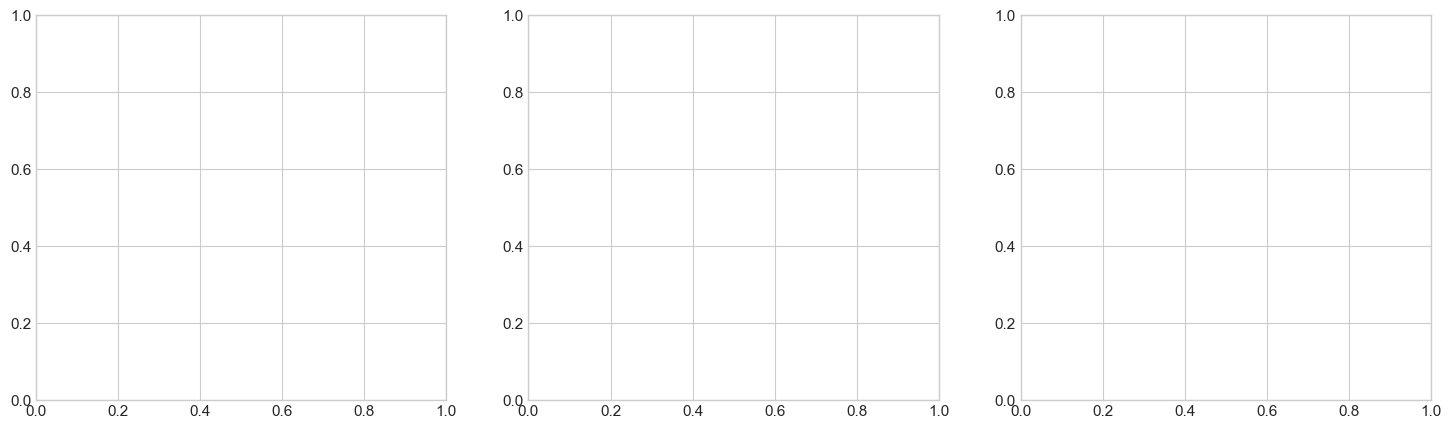

In [153]:
# Plots aller Metriken:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

In [154]:
# Kohärenz:
ax1.plot(x, coherence_scores, marker='o', color='blue')
ax1.set_xlabel("Anzahl Themen")
ax1.set_ylabel("Kohärenz (C_v)")
ax1.set_title("Kohärenz vs. Themenanzahl")

Text(0.5, 1.0, 'Kohärenz vs. Themenanzahl')

In [155]:
# Perplexity:
ax2.plot(x, perplexity_values, marker='o', color='red')
ax2.set_xlabel("Anzahl Themen")
ax2.set_ylabel("Perplexity")
ax2.set_title("Perplexity vs. Themenanzahl")

Text(0.5, 1.0, 'Perplexity vs. Themenanzahl')

In [115]:
# Log-Likelihood:
ax3.plot(x, log_likelihood_values, marker='o', color='green')
ax3.set_xlabel("Anzahl Themen")
ax3.set_ylabel("Log-Likelihood")
ax3.set_title("Log-Likelihood vs. Themenanzahl")

Text(0.5, 1.0, 'Log-Likelihood vs. Themenanzahl')

In [156]:
plt.tight_layout()
plt.savefig('C:/Users/test/Desktop/Projekt_Data Analysis/Themenmodellierung.png', dpi=300)
plt.show()

<Figure size 1200x800 with 0 Axes>

In [157]:
# Sichtung - Themenanzahl:
optimal_coherence_idx = coherence_scores.index(max(coherence_scores))
optimal_perplexity_idx = perplexity_values.index(min(perplexity_values))
optimal_likelihood_idx = log_likelihood_values.index(max(log_likelihood_values))
print("Sichtung der Themenanzahl basierend auf Metriken beendet.")

Sichtung der Themenanzahl basierend auf Metriken beendet.


In [158]:
# Berechnung - Themenanzahl:
optimal_num_topics_coherence = start + optimal_coherence_idx * step
optimal_num_topics_perplexity = start + optimal_perplexity_idx * step
optimal_num_topics_likelihood = start + optimal_likelihood_idx * step
print("Die Themenanzahl wurde optimal berechnet.")

Die Themenanzahl wurde optimal berechnet.


In [159]:
# Ausgabe - Themenanzahl:
print(f"Optimale Themenanzahl basierend auf:")
print(f"- Kohärenz: {optimal_num_topics_coherence}")
print(f"- Perplexity: {optimal_num_topics_perplexity}")
print(f"- Log-Likelihood: {optimal_num_topics_likelihood}")

Optimale Themenanzahl basierend auf:
- Kohärenz: 10
- Perplexity: 10
- Log-Likelihood: 10


In [160]:
# Logikdefinition - mittels semantischem Kohärenz: 
final_num_topics = optimal_num_topics_coherence

print(f"Die Themenanzahl umfasst folgenden Wert: {final_num_topics}")

Die Themenanzahl umfasst folgenden Wert: 10


In [161]:
# Verwendung - Bestes LDA-Modell:
optimal_model_idx = (final_num_topics - start) // step
best_lda_model = model_list[optimal_model_idx]
print("Das am best geeignetste LDA-Modell ist in Verwendung.")

Das am best geeignetste LDA-Modell ist in Verwendung.


In [162]:
# Visualisierung - LDA-Themen:
feature_names = count_vectorizer.get_feature_names_out()
lda_top_words = {}

In [163]:
# Iteration - LDA-Themen:
# Sichtung - Top-Wörter:
for i, topic in enumerate(best_lda_model.components_):
    top_indices = topic.argsort()[:-n_top_words-1:-1]
    top_words = [feature_names[j] for j in top_indices] 
    top_weights = [topic[j] for j in top_indices]    
    
    lda_top_words[f"topic_{i+1}"] = [                   
        {"word": word, "weight": float(weight)}        
        for word, weight in zip(top_words, top_weights) 
    ]
    
    print(f"LDA Thema {i+1}: {', '.join(top_words[:10])}") 

LDA Thema 1: payment account, month ago, late, pay account, loan agreement, due account, paid account, amount, made attempt, make decision
LDA Thema 2: credit account, repo, account, credit reporting, reported late, information account, bureau, remove unauthorized, report year, experian credit
LDA Thema 3: loan agreement, interest, rate, credit account, car loan, interest rate, vehicle, would, balance, paypal account
LDA Thema 4: call, told, called, would, safety, phone call, time, get account, back, number address
LDA Thema 5: letter also, sensitive, receive statement, one bank, copy check, dispute account, mailed, complaint bank, capital one, responding
LDA Thema 6: debt account, collection account, company also, agency, bill, paid account, owe amount, collection call, account, never account
LDA Thema 7: account, card account, bank, credit account, credit check, charge account, fee account, check account, balance, customer care
LDA Thema 8: information account, consumer credit, reput

In [164]:
# JSON-Speicherung der LDA-Themen:
with open('C:/Users/test/Desktop/Projekt_Data Analysis/LDA-Themen.json', 'w') as f:
    json.dump(lda_top_words, f, indent=4)
    print("Die LDA-Themen wurden als JSON-Datei gespeichert.")

Die LDA-Themen wurden als JSON-Datei gespeichert.


In [165]:
# Speicherung - LDA-Modell:
joblib.dump(best_lda_model, 'C:/Users/test/Desktop/Projekt_Data Analysis/LDA-Modell.joblib')
print("Das LDA-Modell wurde als joblib-Datei gespeichert.")

Das LDA-Modell wurde als joblib-Datei gespeichert.


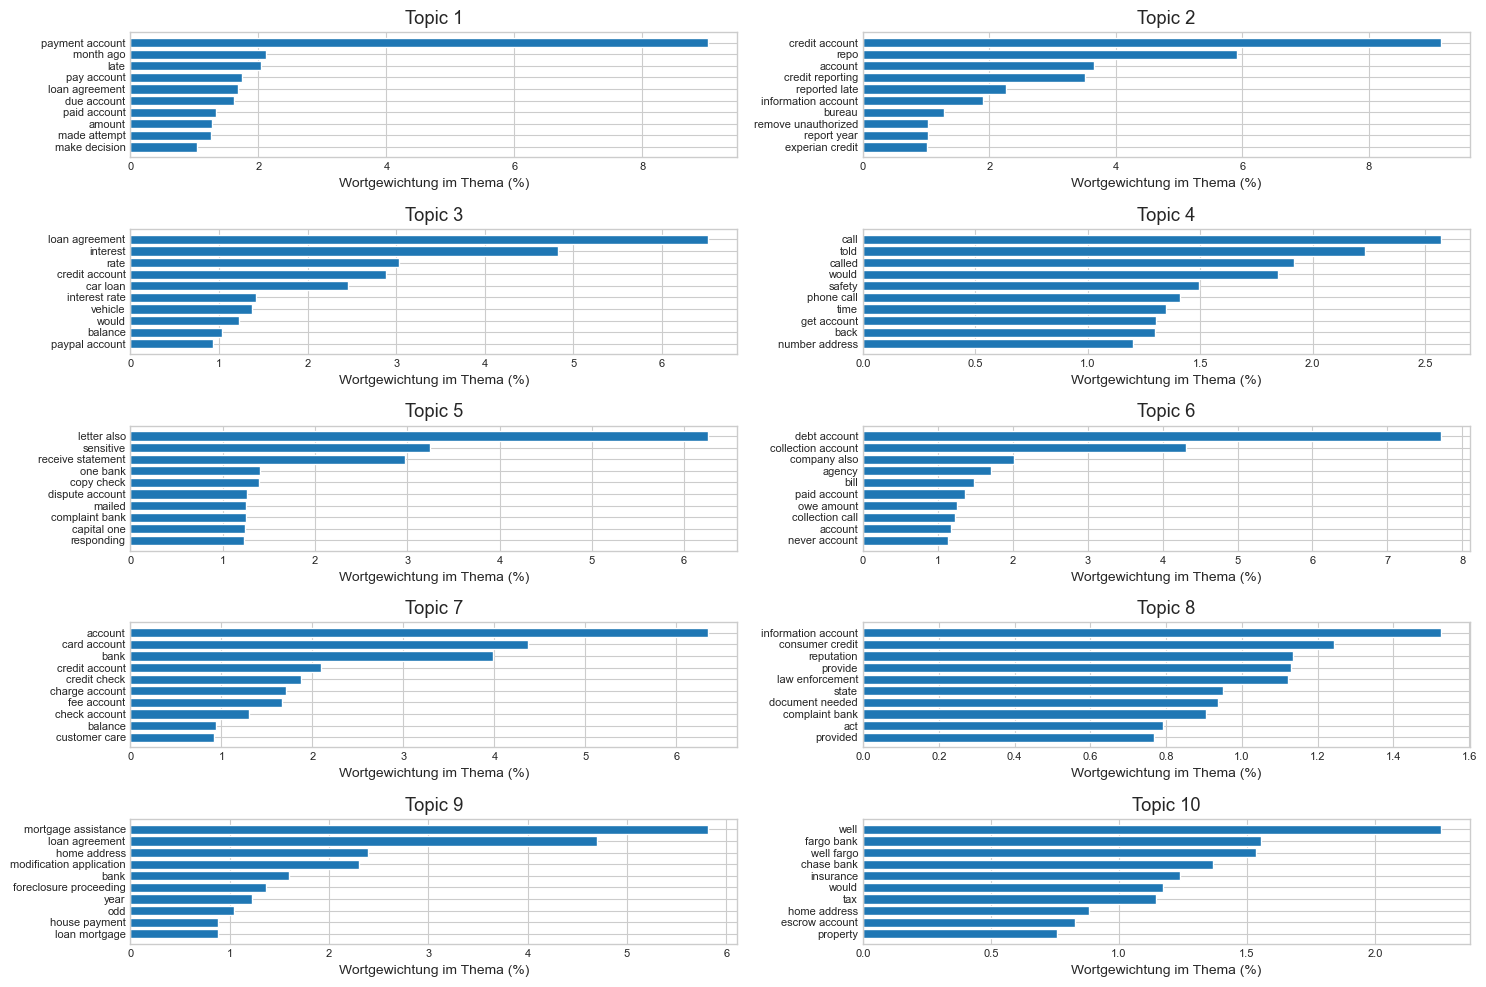

In [166]:
# Visualisierung - Themenexraktion:
plt.figure(figsize=(15, 10))
for topic_idx, topic in enumerate(best_lda_model.components_):                
    top_features_ind = topic.argsort()[:-10 - 1:-1]                            
    top_features = [feature_names[i] for i in top_features_ind]             
    
    # Umrechnung - Gewichtungen in Prozent:
    weights = topic[top_features_ind] / topic.sum() * 100

    # Erstellung - Barplot
    ax = plt.subplot(int(np.ceil(final_num_topics / 2)), 2, topic_idx + 1)
    
    # Erstellung Balkendiagramm - Top-Wörter + deren Gewichtung:
    ax.barh(top_features, weights)
    ax.set_title(f'Topic {topic_idx + 1}')
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_xlabel('Wortgewichtung im Thema (%)', fontsize=10)

plt.tight_layout()

In [136]:
# Funktion - Wortwolken-Erstellung:
def create_wordcloud_for_topics(model, feature_names, n_topics, topic_type="LDA"):
    colors = cm.tab10(np.linspace(0, 1, n_topics))
    
    # Erstellung - Wortwolken:
    fig, axes = plt.subplots(int(np.ceil(n_topics/2)), 2, figsize=(16, int(np.ceil(n_topics/2)*8))) # 
    axes = axes.flatten()
    
    # Themeniteration + Erstellung Wortwolken:
    for i, topic in enumerate(model.components_):
        top_indices = topic.argsort()[:-50-1:-1] # 
        top_words = {feature_names[j]: float(topic[j]) for j in top_indices}
        
        # Erstellung Wortwolken (mit gewichteten Wörtern):
        wordcloud = WordCloud(
            background_color='white',
            width=800, 
            height=400,
            max_words=20,
 
            colormap=f'tab10',
            color_func=lambda *args, **kwargs: tuple(int(v*255) for v in colors[i][:3]), #
            prefer_horizontal=1.0
        ).generate_from_frequencies(top_words)
        
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f"{topic_type} Thema {i+1}", fontsize=16)
        axes[i].axis('off')
        
         # Ausblendung - leerer Plots:
    for i in range(n_topics, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.savefig(f'C:/Users/test/Desktop/Projekt_Data Analysis/{topic_type.lower()}_Wortwolken.png', dpi=300, bbox_inches='tight')


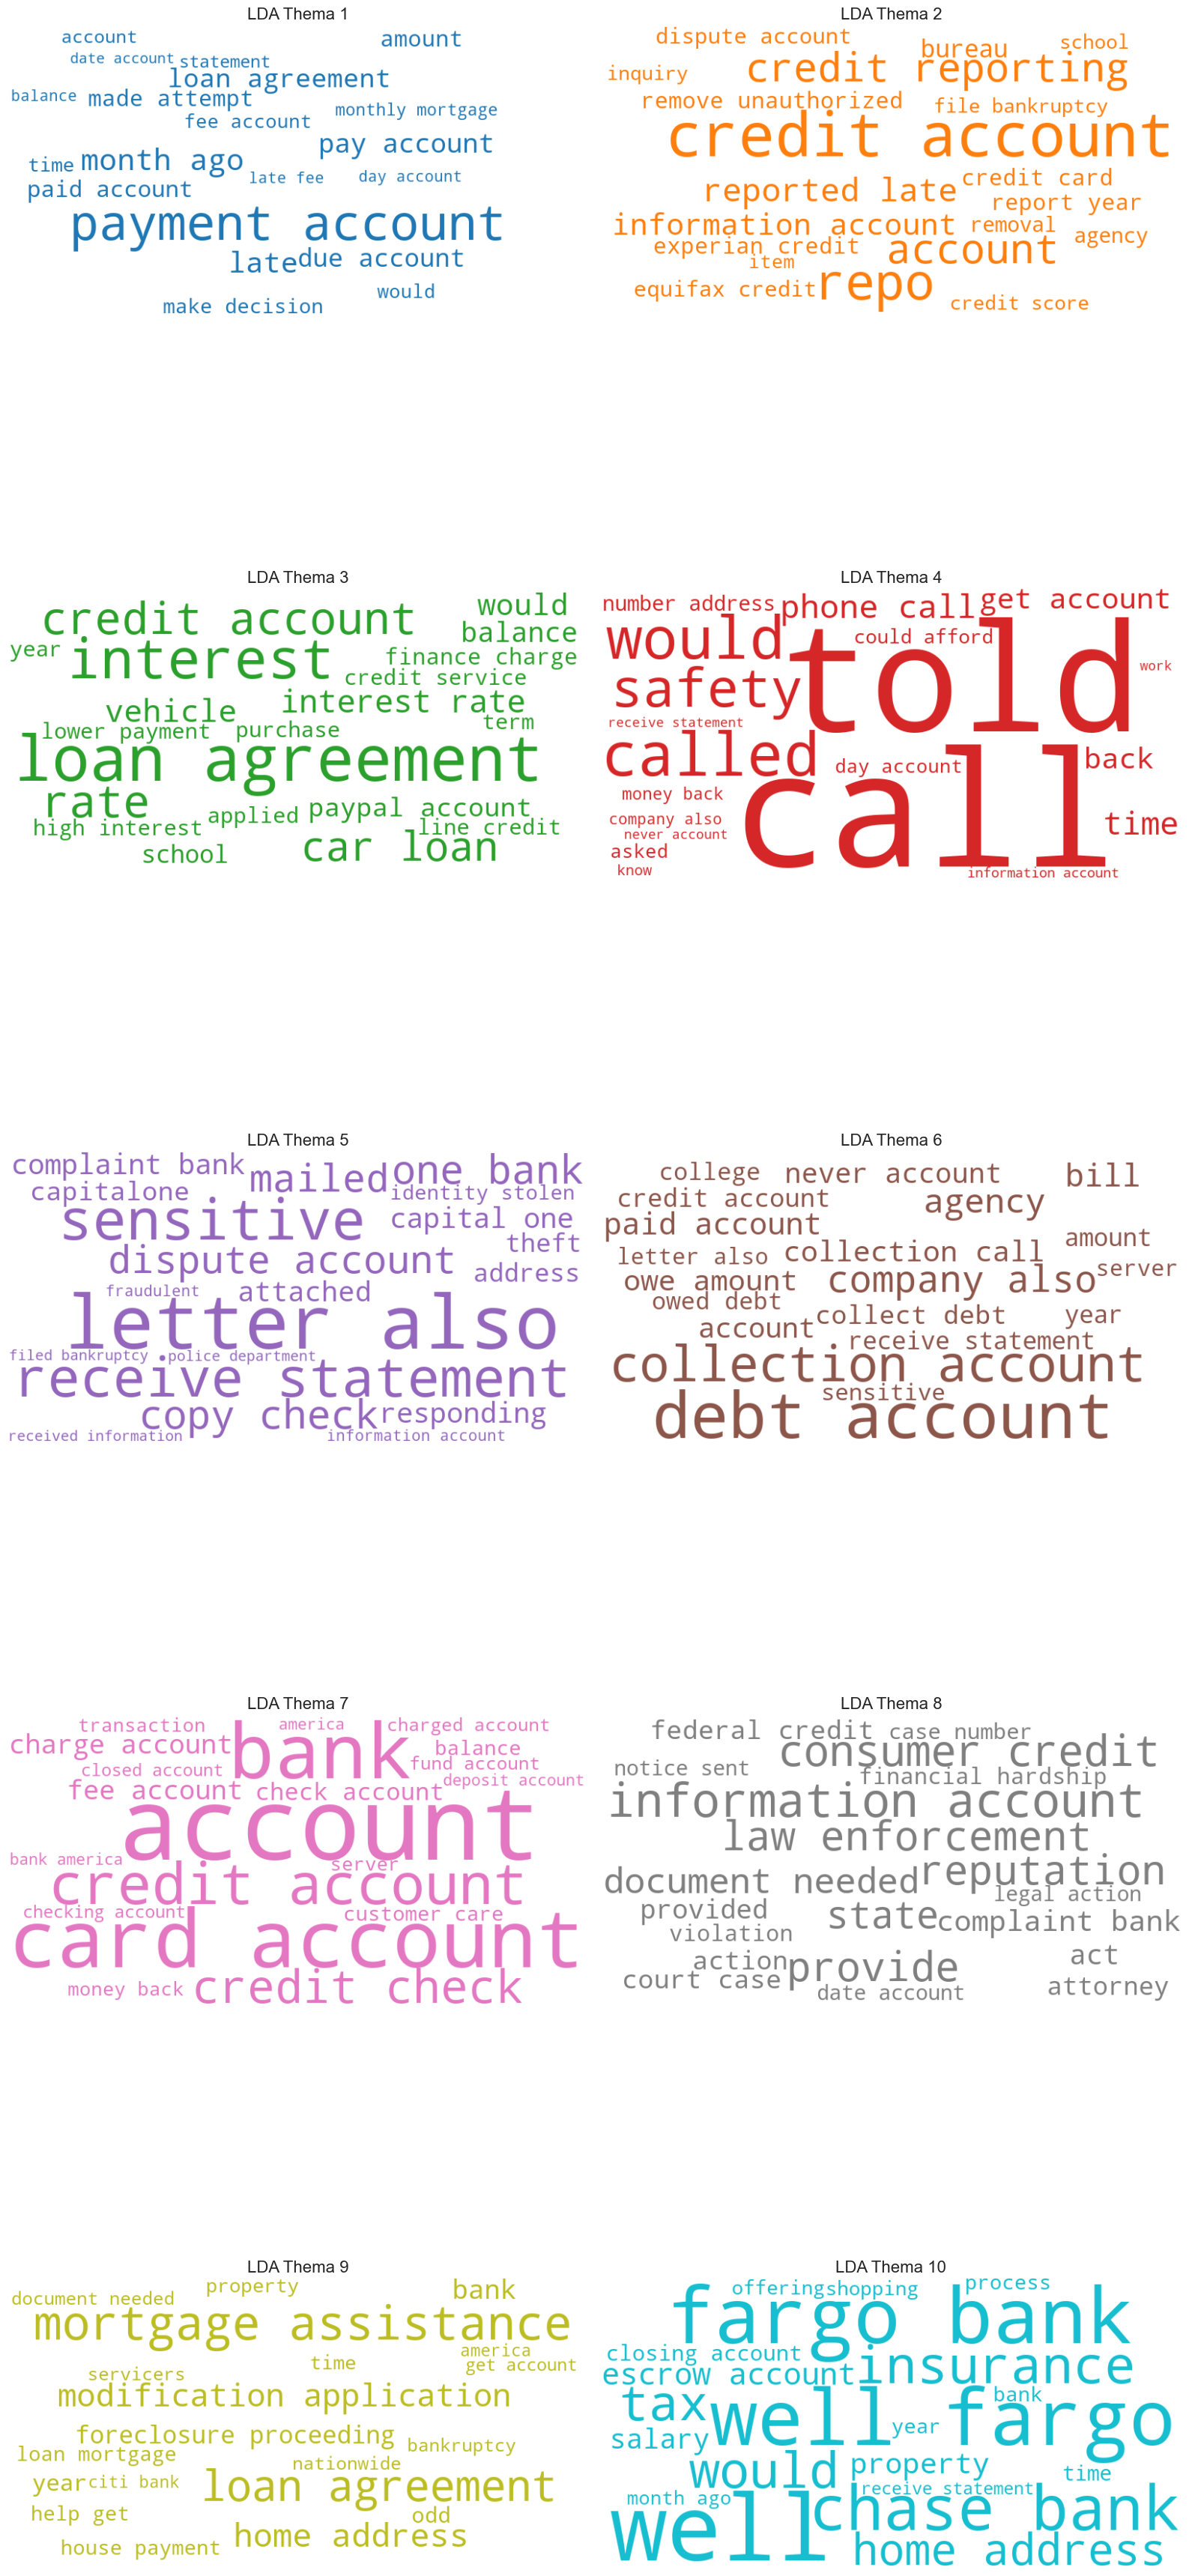

In [167]:
# Wortwolken - LDA-Themen:
create_wordcloud_for_topics(
    best_lda_model, 
    count_vectorizer.get_feature_names_out(), 
    final_num_topics, 
    "LDA"
)

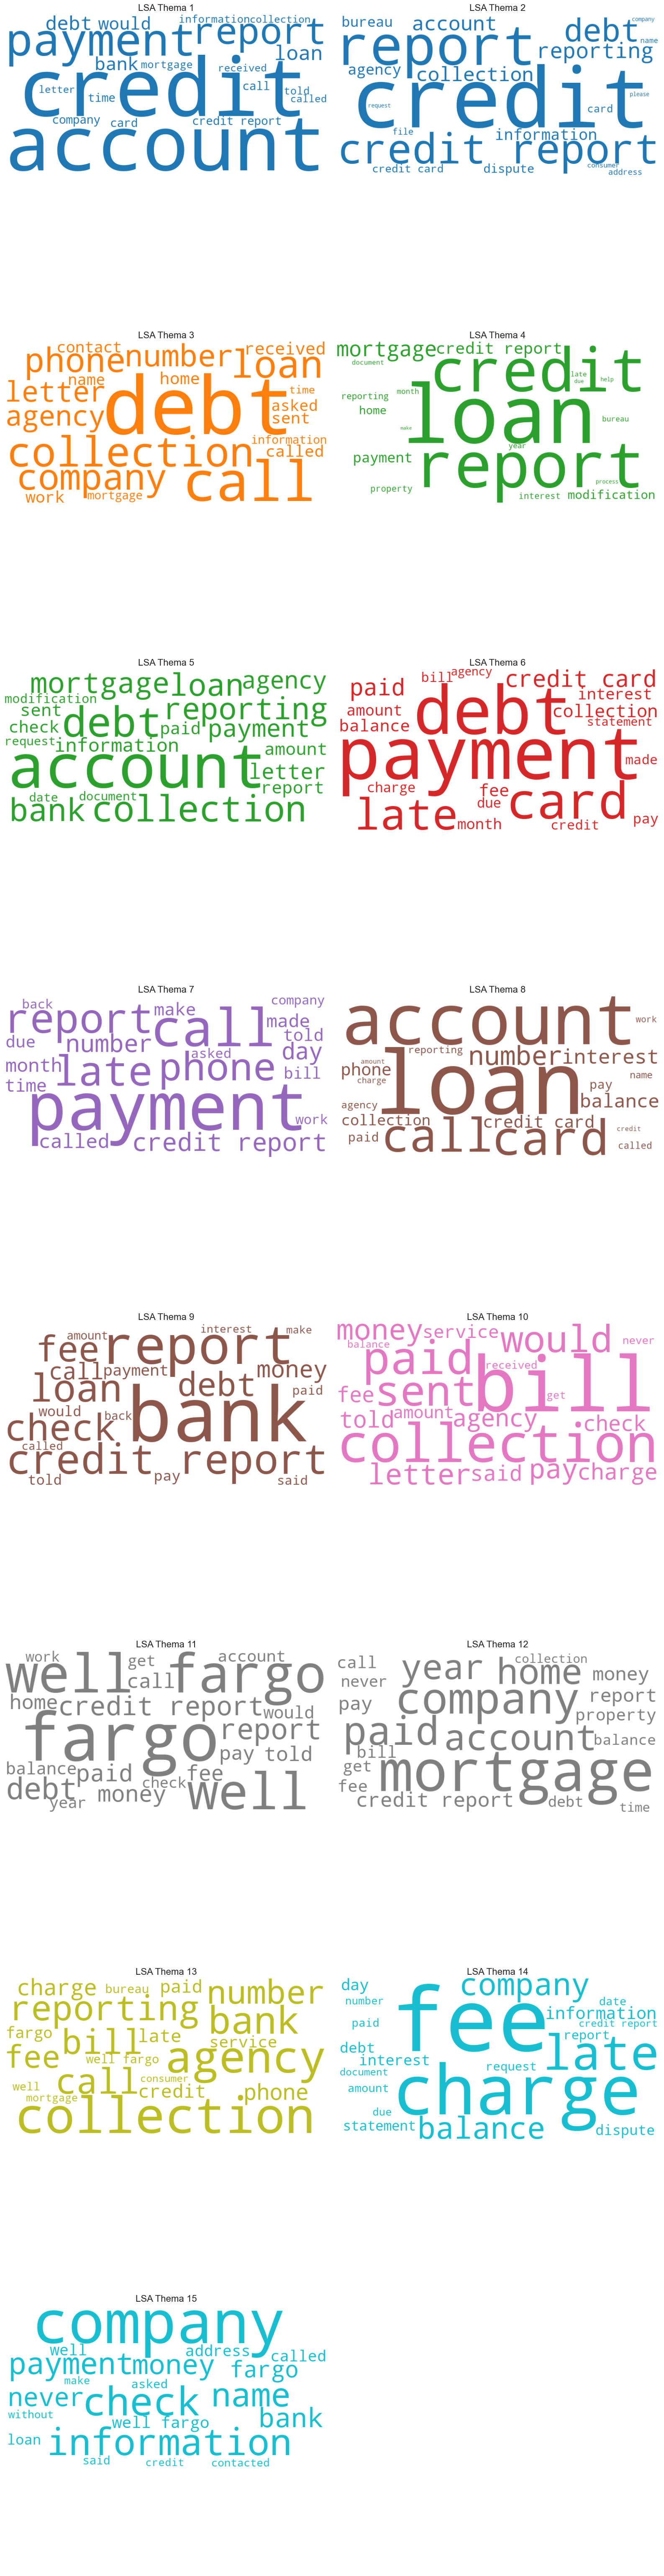

In [138]:
# Wort-Wolken - LSA-Themen:
create_wordcloud_for_topics(
    lsa_model, 
    tfidf_vectorizer.get_feature_names_out(), 
    n_components_lsa, 
    "LSA"
)